In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# **Dataset Info**
## Observed potential vorticity data for August 28, 2005, day Hurricane Katrina was of strongest intensity in Gulf of Mexico.
## Grib file format found in the ERA-Interim database on Cola server.
## *by Jake Campbell, Assignment 1a, 1b, and 1c.*

In [2]:
path='/shared/working/rean/era-interim/daily/data/2005/'
fname='ei.oper.an.pl.regn128sc.2005082800'

In [3]:
ds=xr.open_dataset(path+fname,engine='cfgrib',backend_kwargs={'indexpath': ''})

In [4]:
ds

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 37, latitude: 256, longitude: 512)
Coordinates:
    number         int64 ...
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 875 ... 7 5 3 2 1
  * latitude       (latitude) float64 89.46 88.77 88.07 ... -88.07 -88.77 -89.46
  * longitude      (longitude) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
    valid_time     datetime64[ns] ...
Data variables:
    pv             (isobaricInhPa, latitude, longitude) float32 ...
    z              (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    vo             (isobaricInhPa, latitude, longitude) float32 ...
    d              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isobaricInhPa, latitude, longitude) float32 ...
    o3             (isobaricInhPa, latitude, longitude) float32 ...
    clwc           (isobaricInhPa, latitude, longitude) float32 ...
    ciwc           (isobaricInhPa, latitude, longitude) float32 ...
    cc             (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-12-01T20:52:32 GRIB to CDM+CF via cfgrib-0....

In [5]:
ds['pv']

<xarray.DataArray 'pv' (isobaricInhPa: 37, latitude: 256, longitude: 512)>
[4849664 values with dtype=float32]
Coordinates:
    number         int64 0
    time           datetime64[ns] 2005-08-28
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 875 ... 7 5 3 2 1
  * latitude       (latitude) float64 89.46 88.77 88.07 ... -88.07 -88.77 -89.46
  * longitude      (longitude) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
    valid_time     datetime64[ns] 2005-08-28
Attributes:
    GRIB_paramId:                             60
    GRIB_shortName:                           pv
    GRIB_units:                               K m**2 kg**-1 s**-1
    GRIB_name:                                Potential vorticity
    GRIB_cfVarName:                           pv
    GRIB_dataType:                            an
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      131072
    GRIB_totalNumber:                         0
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_gg
    GRIB_gridDefinitionDescription:           Gaussian Latitude/Longitude Grid
    GRIB_Nx:                                  512
    GRIB_iDirectionIncrementInDegrees:        0.703
    GRIB_iScansNegatively:                    0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.297
    GRIB_N:                                   128
    GRIB_Ny:                                  256
    long_name:                                Potential vorticity
    units:                                    K m**2 kg**-1 s**-1

In [6]:
ds_pv500=ds.sel(isobaricInhPa=500)
ds_pv500

<xarray.Dataset>
Dimensions:        (latitude: 256, longitude: 512)
Coordinates:
    number         int64 0
    time           datetime64[ns] 2005-08-28
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  int64 500
  * latitude       (latitude) float64 89.46 88.77 88.07 ... -88.07 -88.77 -89.46
  * longitude      (longitude) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
    valid_time     datetime64[ns] 2005-08-28
Data variables:
    pv             (latitude, longitude) float32 ...
    z              (latitude, longitude) float32 ...
    t              (latitude, longitude) float32 ...
    q              (latitude, longitude) float32 ...
    w              (latitude, longitude) float32 ...
    vo             (latitude, longitude) float32 ...
    d              (latitude, longitude) float32 ...
    r              (latitude, longitude) float32 ...
    o3             (latitude, longitude) float32 ...
    clwc           (latitude, longitude) float32 ...
    ciwc           (latitude, longitude) float32 ...
    cc             (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-12-01T20:52:32 GRIB to CDM+CF via cfgrib-0....

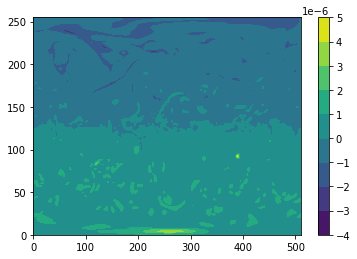

In [7]:
plt.contourf(ds_pv500['pv'])
plt.colorbar()

Text(0.5, 1.0, 'ERA-Interim Potential Vorticity Data on August 28, 2005 [Hurricane Katrina Peak Strength] @ 500hPA')

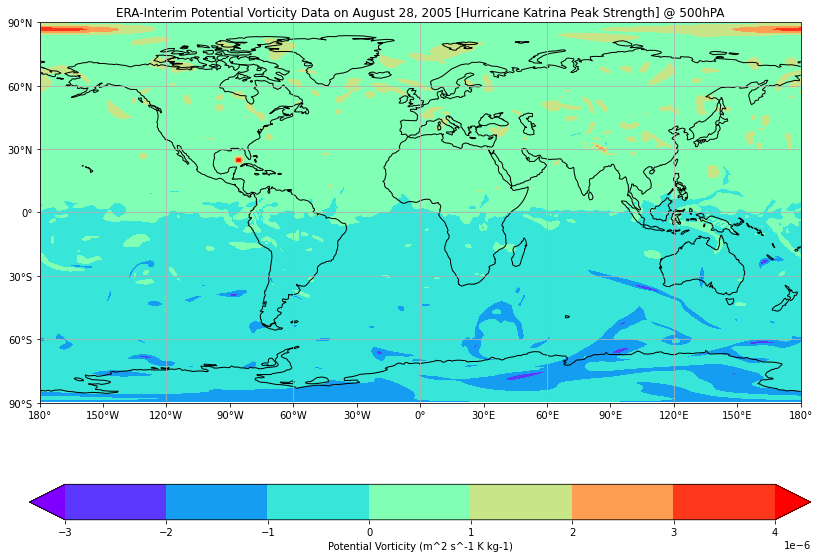

In [8]:
import cartopy.crs as zrs
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker

fig = plt.figure(figsize=(20,10))

# set the axis using the specified map
#Robinson map CANNOT show xticks and yticks, so no LAT/LON labels
ax=plt.axes(projection=zrs.PlateCarree())

# Add Cyclic point
data=ds_pv500['pv']
data, longitude=add_cyclic_point(data,coord=ds_pv500['longitude'])

# Make a filled contour plot
cs=ax.contourf(longitude,ds_pv500['latitude'],
            data,
            transform=zrs.PlateCarree(),
           cmap='rainbow',extend='both')
# cmap line adds color map

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
# Define the xticks for longtitude
ax.set_xticks(np.arange(-180,181,30),crs=zrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30),crs=zrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Potential Vorticity (m^2 s^-1 K kg-1)')

# Add title
plt.title('ERA-Interim Potential Vorticity Data on August 28, 2005 [Hurricane Katrina Peak Strength] @ 500hPA')

In [9]:
ds=ds.reindex(latitude=list(reversed(ds['latitude'])))
ds_gom=ds.sel(longitude=slice(360-120,360-60),latitude=slice(20,40))


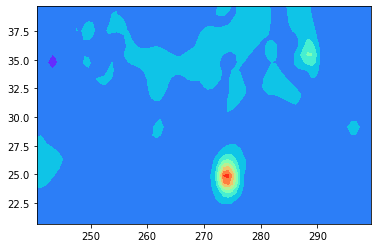

In [10]:
plt.contourf(ds_gom['longitude'],ds_gom['latitude'],ds_gom['pv'][15,:,:],cmap='rainbow')

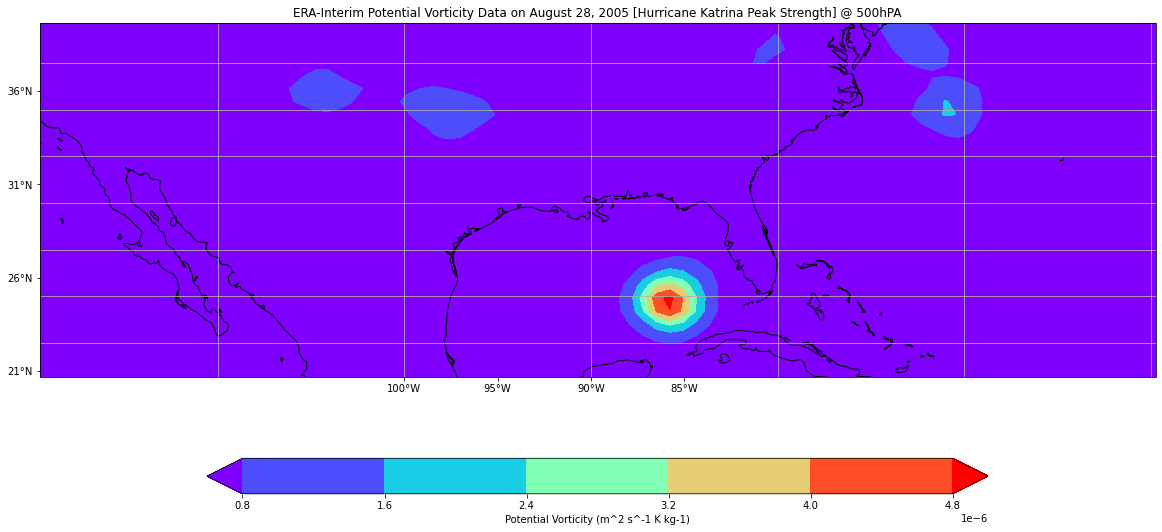

In [11]:
import cartopy.crs as zrs
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker

fig = plt.figure(figsize=(20,10))

# set the axis using the specified map
#Robinson map CANNOT show xticks and yticks, so no LAT/LON labels
ax=plt.axes(projection=zrs.PlateCarree())

# Add Cyclic point
data=ds_gom['pv'][16,:,:]
data, longitude=add_cyclic_point(data,coord=ds_gom['longitude'])

# Make a filled contour plot
cs=ax.contourf(longitude,ds_gom['latitude'],
            data,
            transform=zrs.PlateCarree(),
           cmap='rainbow',extend='both')
# cmap line adds color map

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()
# Define the xticks for longtitude
ax.set_xticks(np.arange(-100,-80,5),crs=zrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(21,40,5),crs=zrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Potential Vorticity (m^2 s^-1 K kg-1)')

# Add title
plt.title('ERA-Interim Potential Vorticity Data on August 28, 2005 [Hurricane Katrina Peak Strength] @ 500hPA')
plt.savefig('HW1-Potential Vorticity.png')

In [12]:
help(ax.contourf)

Help on method contourf in module cartopy.mpl.geoaxes:

contourf(*args, **kwargs) method of cartopy.mpl.geoaxes.GeoAxesSubplot instance
    Add the "transform" keyword to :func:`~matplotlib.pyplot.contourf'.
    
    Other Parameters
    ----------------
    transform
        A :class:`~cartopy.crs.Projection`.

